In [1]:
'''objective-1.>In this competition we will work with a  time-series dataset consisting of daily sales data, 
They are asking  to predict total sales for every product and store in the next month.
For each id in the test set, we must predict a total number of sales. The file should contain a header and have the following format:

ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5
etc.'''

In [ ]:
'''description-We are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.
File descriptions
sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
sample_submission.csv - a sample submission file in the correct format.
items.csv - supplemental information about the items/products.
item_categories.csv  - supplemental information about the items categories.
shops.csv- supplemental information about the shops.

Data fields
ID - an Id that represents a (Shop, Item) tuple within the test set
shop_id - unique identifier of a shop
item_id - unique identifier of a product
item_category_id - unique identifier of item category
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
item_price - current price of an item
date - date in format dd/mm/yyyy
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
item_name - name of item
shop_name - name of shop
item_category_name - name of item category

In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data as data frame
train_data =pd.DataFrame(pd.read_csv('sales_train_v2.csv'))
shops_data = pd.DataFrame(pd.read_csv('shops.csv'))
item_data = pd.DataFrame(pd.read_csv('items.csv'))
item_categorise_data = pd.DataFrame(pd.read_csv('item_categories (1).csv'))
item_data.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [14]:
train_data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013/01/01,0,59,22154,999.00,1.0
1,2013/01/01,0,25,2552,899.00,1.0
2,2013/01/01,0,25,2552,899.00,-1.0
3,2013/01/01,0,25,2554,1709.05,1.0
4,2013/01/01,0,25,2555,1099.00,1.0
5,2013/01/01,0,25,2564,349.00,1.0
6,2013/01/01,0,25,2565,549.00,1.0
7,2013/01/01,0,25,2572,239.00,1.0
8,2013/01/01,0,25,2572,299.00,1.0
9,2013/01/01,0,25,2573,299.00,3.0


In [15]:
#visualising the number of data in each feature
print ('number of shops: ', len(set(train_data['shop_id'].values)))
print ('number of items: ', len(set(train_data['item_id'].values)))
print ('number of item_cat: ', len(set(item_categorise_data['item_category_id'].values)))
print ('number of items: ', train_data['item_id'].max())
num_month = train_data['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train_data.shape)
train_data.head()

number of shops:  60
number of items:  21807
number of item_cat:  84
number of items:  22169
number of month:  33
size of train:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013/01/01,0,59,22154,999.00,1.0
1,2013/01/01,0,25,2552,899.00,1.0
2,2013/01/01,0,25,2552,899.00,-1.0
3,2013/01/01,0,25,2554,1709.05,1.0
4,2013/01/01,0,25,2555,1099.00,1.0


In [5]:
#splitting the data ,then reverseing the data then join the data and atlast sorting the data
train_data.date = sorted(['/'.join(reversed(i.split('.'))) for i in train_data['date']])
train_data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [6]:

# merge sales and shop
merge_table_1 = pd.merge(left = train_data, right = shops_data,how = 'left', on ='shop_id')
shop_month_sale = merge_table_1[['item_cnt_day','shop_id','date_block_num']].reset_index().drop('index',1).groupby(['shop_id','date_block_num']).sum()
shop_month_sale.head(10)


item_cnt_day
shop_id date_block_num              
0       0                     5578.0
        1                     6127.0
1       0                     2947.0
        1                     3364.0
2       0                     1146.0
        1                      488.0
        2                      753.0
        3                      583.0
        4                      553.0
        5                      832.0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


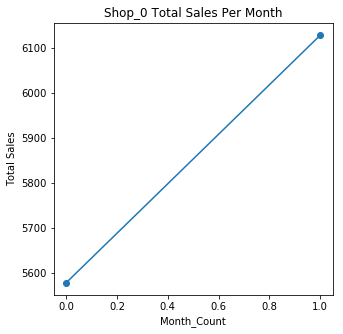

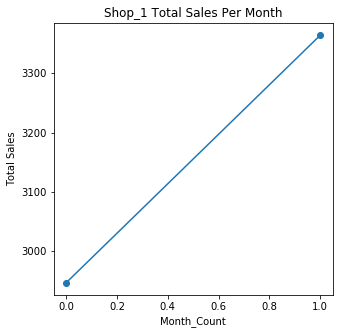

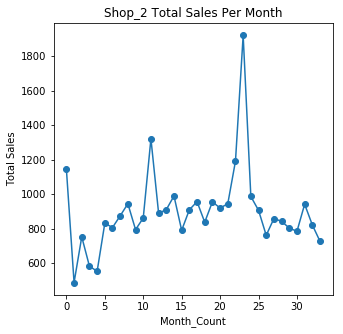

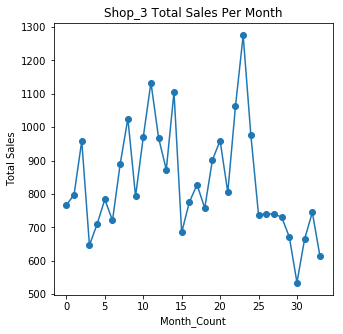

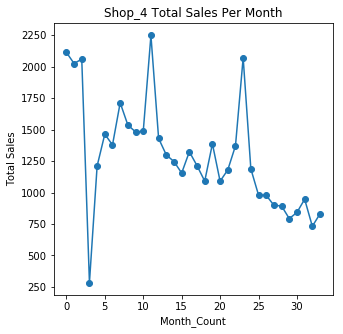

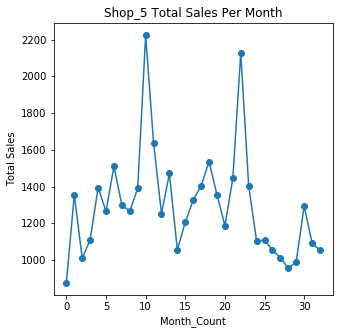

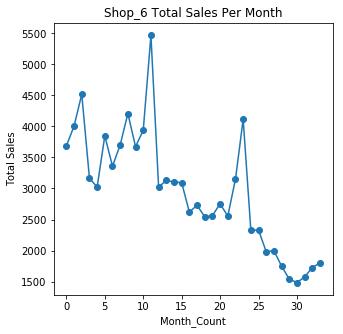

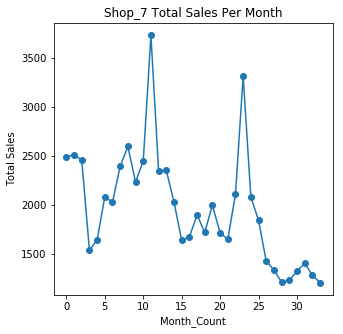

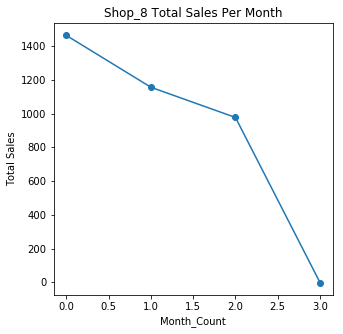

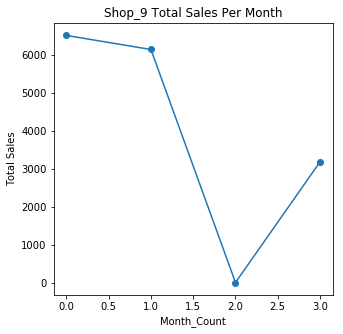

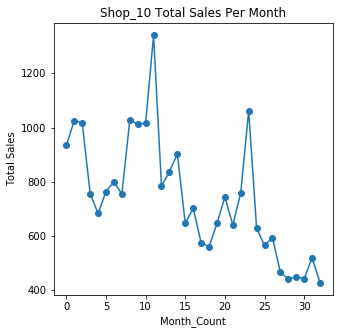

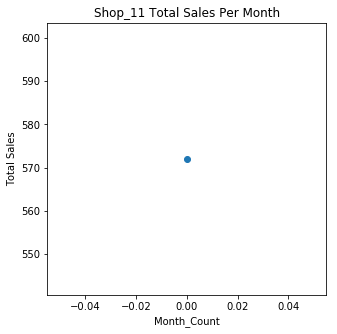

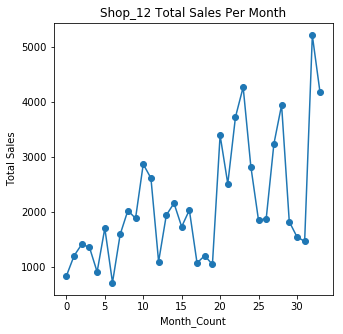

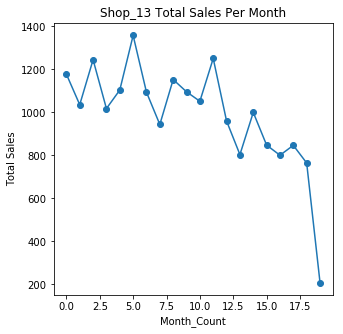

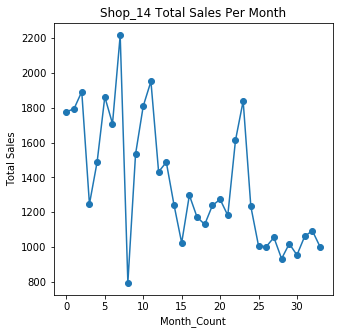

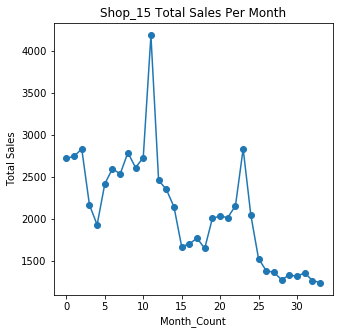

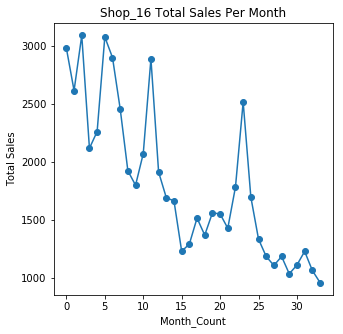

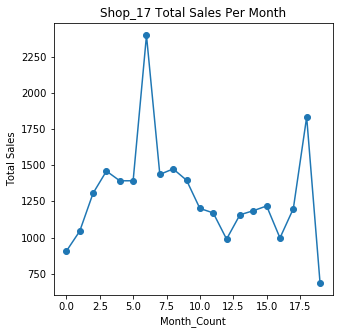

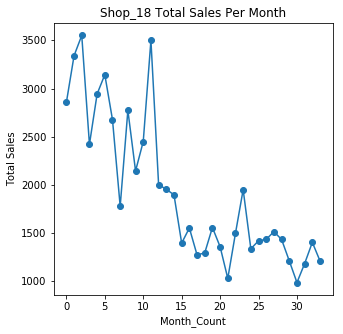

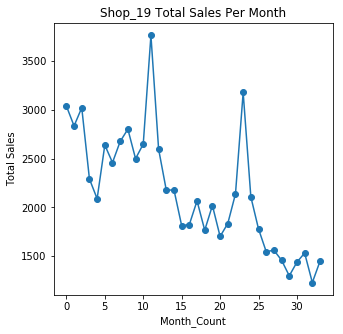

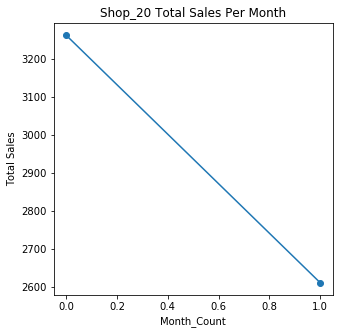

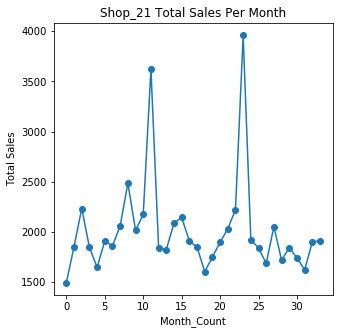

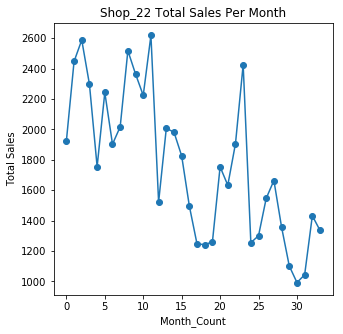

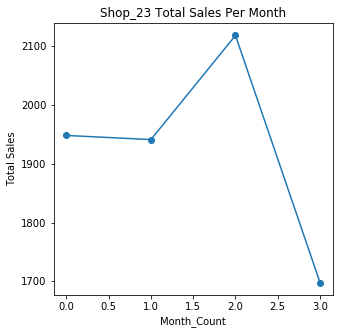

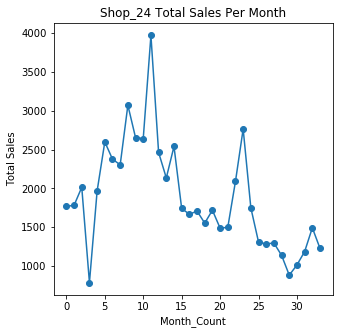

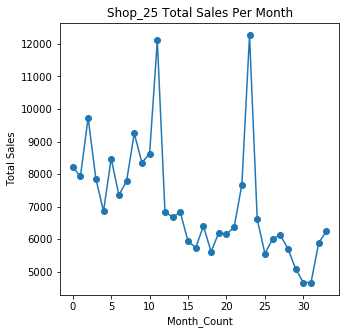

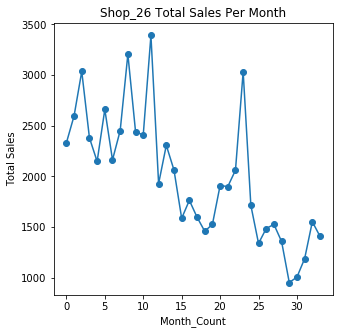

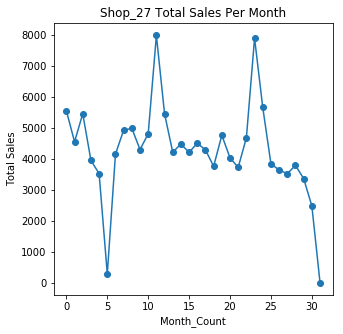

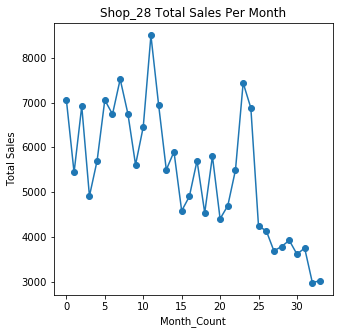

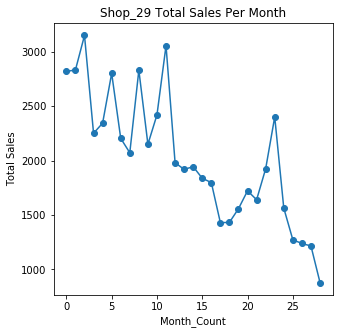

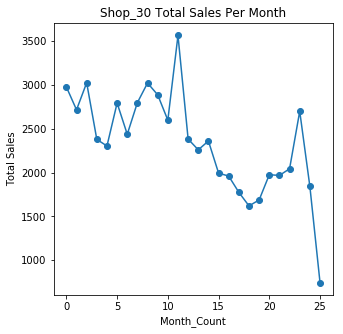

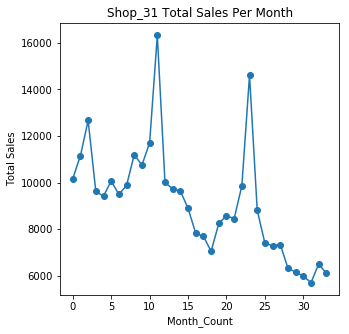

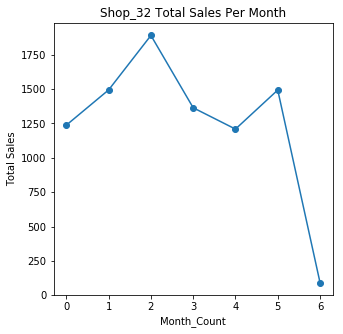

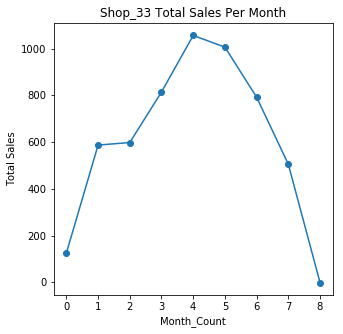

In [9]:
#Visualising shop sale of all  shops over a 33 month period 
def line_plot(a):
    x_axis = np.array([x for x in range(0,len(shop_month_sale['item_cnt_day'][a]))])
    y_axis = shop_month_sale['item_cnt_day'][a]
    plt.figure(figsize=(5,5))
    #print x_axis, #print y_axis
    plt.plot(x_axis,y_axis,'-o')
    plt.ylabel('Total Sales')
    plt.xlabel('Month_Count')
    plt.title('Shop_'+str(a)+' Total Sales Per Month')
for i in range(0,len(shop_month_sale.index.levels[1])):
    line_plot(i)

In [10]:
# merge sales,shop and item_categories
merge_table_2 = pd.merge(left = merge_table_1, right = item_data ,how = 'left', on ='item_id')
merge_table_2.dtypes

date                 object
date_block_num        int64
shop_id               int64
item_id               int64
item_price          float64
item_cnt_day        float64
shop_name            object
item_name            object
item_category_id      int64
dtype: object

In [19]:
# each category saled in every shop every month
category_sale = merge_table_2[['shop_id','date_block_num','item_category_id','item_cnt_day']].reset_index().drop('index',1).groupby(['shop_id','date_block_num','item_category_id']).sum()
category_sale.head(10)

item_cnt_day
shop_id date_block_num item_category_id              
0       0              2                         53.0
                       3                         28.0
                       4                         16.0
                       5                         28.0
                       6                         65.0
                       11                        24.0
                       13                         9.0
                       14                         8.0
                       15                         6.0
                       19                       345.0

In [12]:
# each item saled under which category in every shop every month
item_sale = merge_table_2[['shop_id','date_block_num','item_category_id','item_id','item_cnt_day']].reset_index().drop('index',1).groupby(['shop_id','date_block_num','item_category_id','item_id']).sum()
item_sale.head(10)

item_cnt_day
shop_id date_block_num item_category_id item_id              
0       0              2                5572             10.0
                                        5573              1.0
                                        5575              4.0
                                        5576              5.0
                                        5609              1.0
                                        5612              1.0
                                        5623              1.0
                                        5627              2.0
                                        5629              9.0
                                        5630              1.0